# Objective :
### To identify the best OTT platform for releasing movies by analyzing IMDb ratings across different genres and platforms, aiming to optimize content release strategies for maximum viewer engagement and satisfaction.

# ----------------------------------------------------------------------------------------

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Data Collection

In [5]:
movies=pd.read_csv("MoviesOnOTTPlatforms.csv", encoding="utf-8", encoding_errors="ignore")

#####  Encoding=utf-8 is used because,file is likely contains invalid or non-UTF-8 characters, and this ensures the program does not crash.

In [7]:
movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime in Min
0,15902,"""22"" A film about Veterans, Healthcare and Sui...",2018,NaN,NaN,NaN,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN
1,10303,IMomSoHard Live,2019,18+,5.2,NaN,0,0,1,0,0.0,Brian Volk-Weiss,Comedy,United States,English,NaN
2,15143,LoveSwag,2015,13+,5.4,NaN,0,0,1,0,0.0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English,2.0
3,3331,Rucker50,2016,NaN,5.3,NaN,1,0,0,0,0.0,Robert McCullough Jr.,Documentary,United States,English,56.0
4,2798,Selfie,2014,NaN,6.1,NaN,1,0,0,0,0.0,Cristina Jacob,Comedy,Romania,Romanian,123.0


# ----------------------------------------------------------------------------------------

## Data Information

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16804 entries, 0 to 16803
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16804 non-null  int64  
 1   Title            16804 non-null  object 
 2   Year             16804 non-null  int64  
 3   Age              7414 non-null   object 
 4   IMDb             16233 non-null  float64
 5   Rotten Tomatoes  5158 non-null   float64
 6   Netflix          16804 non-null  int64  
 7   Hulu             16804 non-null  int64  
 8   Prime Video      16804 non-null  int64  
 9   Disney+          16804 non-null  int64  
 10  Type             16744 non-null  float64
 11  Directors        16078 non-null  object 
 12  Genres           16529 non-null  object 
 13  Country          16369 non-null  object 
 14  Language         16190 non-null  object 
 15  Runtime in Min   16212 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 2.1+ MB


In [10]:
movies.shape  

(16804, 16)

In [11]:
movies.columns     

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime in Min'],
      dtype='object')

In [12]:
movies.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type               float64
Directors           object
Genres              object
Country             object
Language            object
Runtime in Min     float64
dtype: object

# ----------------------------------------------------------------------------------------

## Data PreProcessing

### A) Data _Cleaning

In [15]:
movies.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16799    False
16800    False
16801    False
16802    False
16803    False
Length: 16804, dtype: bool

In [16]:
movies.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11646
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                  60
Directors            726
Genres               275
Country              435
Language             614
Runtime in Min       592
dtype: int64

<Axes: >

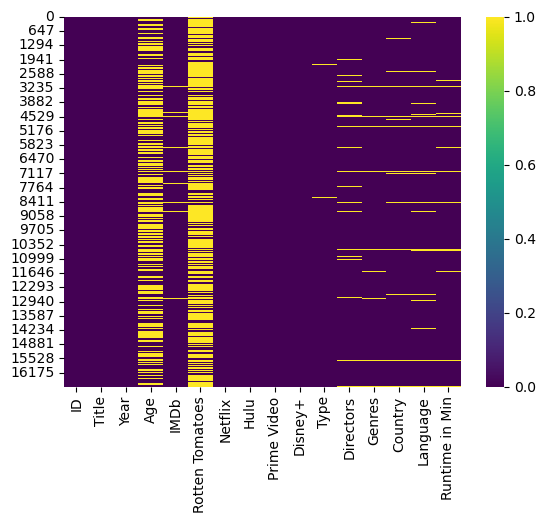

In [17]:
sns.heatmap(movies.isnull(),cmap="viridis")

##### The heatmap clearly shows the missing/null value majorly present in Rotten Tomatoes column and "Age" colums. 

In [19]:
movies.columns = movies.columns.str.replace(' ','_')               # it will replace the space between the columns with the '_"
movies.columns = movies.columns.str.strip()                        # it will trim the extra space from the columns

#### Missing Value Percentage



In [21]:
Missing_Age=movies.Age.isnull().sum()/len(movies)*100

In [22]:
Missing_IMDb=movies.IMDb.isnull().sum()/len(movies)*100

In [23]:
Missing_RottenT=movies.Rotten_Tomatoes.isnull().sum()/len(movies)*100

In [24]:
Missing_Type=movies.Type.isnull().sum()/len(movies)*100

In [25]:
Missing_Directors =movies.Directors.isnull().sum()/len(movies)*100

In [26]:
Missing_Genres =movies.Genres.isnull().sum()/len(movies)*100

In [27]:
Missing_Country =movies.Country.isnull().sum()/len(movies)*100

In [28]:
Missing_Language =movies.Language.isnull().sum()/len(movies)*100

In [29]:
Missing_Runtime_in_Min =movies.Runtime_in_Min.isnull().sum()/len(movies)*100

In [30]:
print("Age",round(Missing_Age,2),"%")
print("IMDb",round(Missing_IMDb,2),"%")
print("Rotten_Tomatoes",round(Missing_RottenT,2),"%")
print("Type",round(Missing_Type,2),"%")
print("Directors",round(Missing_Directors,2),"%")
print("Genres",round(Missing_Genres,2),"%")
print("Country",round(Missing_Country,2),"%")
print("Language",round(Missing_Language,2),"%")
print("Runtime_in_Min",round(Missing_Runtime_in_Min,2),"%")

Age 55.88 %
IMDb 3.4 %
Rotten_Tomatoes 69.3 %
Type 0.36 %
Directors 4.32 %
Genres 1.64 %
Country 2.59 %
Language 3.65 %
Runtime_in_Min 3.52 %


##### It shows us that "rotten_tomatoes" and "age" columns are  having maximum percentage of missing values,so i will drop it and i will also drop the missing value rows from "Director" columns and fill the null values with their median and mode to get the clean data.  

#### Drop the Column

In [33]:
movies.drop(["Rotten_Tomatoes","Age"],axis=1,inplace=True)

In [34]:
movies.drop(["Type"],axis=1,inplace=True)   # As it is not necessary column for our analysis,so i am dropping it 

#### Drop the Null values From Directors Column

In [36]:
movies.dropna(subset=["Directors"],inplace=True)

#### Fill the Null Values withe the median and mode.

In [38]:
movies.fillna({"Genres": movies.Genres.mode()[0],"IMDb": movies.IMDb.max(),"Country": movies.Country.mode()[0],"Language": movies.Language.mode()[0],"Runtime_in_Min": movies.Runtime_in_Min.mean()}, inplace=True)


<Axes: >

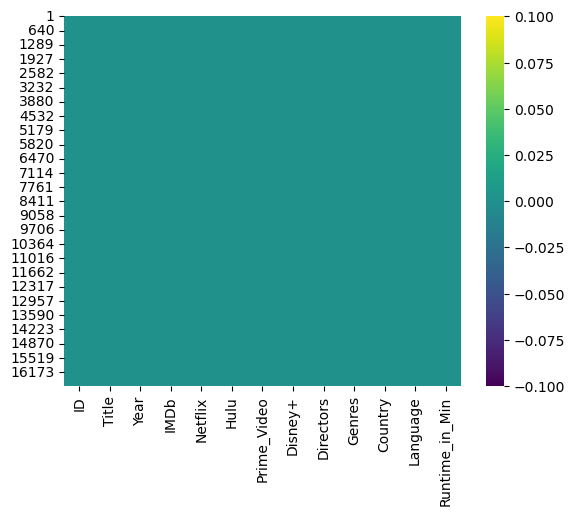

In [39]:
sns.heatmap(movies.isnull(),cmap="viridis")

#### Our Data is Cleaned , we have droped unnecessary columns, unnecessary rows(null value rows from directors column),and filled some columns with their  median and modes.

### ---------------------------------------------------------------------------------------------------------------------------------

### B) Data Transformation

#### Creating the columns

##### IMDb_Rating_Category

In [43]:
bins = [0, 3, 7, 10]
labels = ['Low', 'Medium', 'High']
movies['IMDb_Rating_Category'] = pd.cut(movies['IMDb'], bins=bins, labels=labels, right=True)
movies.head(2)

,ID,Title,Year,IMDb,Netflix,Hulu,Prime_Video,Disney+,Directors,Genres,Country,Language,Runtime_in_Min,IMDb_Rating_Category
1,10303,IMomSoHard Live,2019,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English,94.11062,Medium
2,15143,LoveSwag,2015,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English,2.00000,Medium


##### Platform

In [74]:
movies.loc[movies['Netflix'] == 1, 'Platform'] = "Netflix"
movies.loc[movies['Hulu'] == 1, 'Platform'] = "Hulu"
movies.loc[movies['Prime_Video'] == 1, 'Platform'] = "Prime_Video"
movies.loc[movies['Disney+'] == 1, 'Platform'] = "Disney+"

##### A Table

In [151]:
a=pd.concat([movies,genre_dummies], axis=1)

##### B Table

In [153]:
b= pd.concat([a[['IMDb']],genre_dummies], axis=1)

##### Geners Table

In [85]:
genre_dummies = movies['Genres'].str.get_dummies(sep=',')

##### Runtime_Category

In [134]:
movies.columns

Index(['ID', 'Title', 'Year', 'IMDb', 'Netflix', 'Hulu', 'Prime_Video',
       'Disney+', 'Directors', 'Genres', 'Country', 'Language',
       'Runtime_in_Min', 'IMDb_Rating_Category', 'Platform_Count', 'Platform',
       'Runtime_Category'],
      dtype='object')

In [149]:
def categorize_runtime(row):
    if row['Runtime_in_Min'] < 60:
        return 'Short'
    elif 60 <= row['Runtime_in_Min'] < 120:
        return 'Medium'
    else:
        return 'Long'

movies['Runtime_Category'] = movies.apply(categorize_runtime, axis=1)


#### we have added the required columns in the table and also crreated the tables for language,directors ,country .refrence from Salim Amarti. 
#### Now We are ready for EDA process(Exploratory Data Analysis)

# ----------------------------------------------------------------------------------------

## Data Analysis

In [91]:
movies.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime_Video,Disney+,Directors,Genres,Country,Language,Runtime_in_Min,IMDb_Rating_Category,Platform_Count,Platform,Runtime_Category
1,10303,IMomSoHard Live,2019,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English,94.11062,Medium,1,Prime_Video,Medium
2,15143,LoveSwag,2015,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English,2.00000,Medium,1,Prime_Video,Short
3,3331,Rucker50,2016,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English,56.00000,Medium,1,Netflix,Short
4,2798,Selfie,2014,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian,123.00000,Medium,1,Netflix,Long
5,2838,SquadGoals,2018,4.0,1,0,0,0,Danny J. Boyle,"Drama,Thriller",United States,English,90.00000,Medium,1,Netflix,Medium


### Here are some questions for analysis.

           Which OTT platform has the most movies?
           Which OTT platform has the highest percentage of high-rated movies (IMDb ≥ 7)?
           What is the average IMDb rating of movies exclusive to each OTT platform?
           Which platform offers the most genre diversity in its catalog?
           What is the top genre with the highest average rating across all platforms?
           What is the genre with the highest average IMDb rating?
           What is the top genre per platform?
           What is the top genre per year?
           What is the distribution of IMDb ratings for movies released in the last 5 years?
           How does the average movie runtime vary across OTT platforms?
           How old are the movies on OTT platforms on average (overall and split by platform)?
           How does the average IMDb rating of movies differ between platforms for the same genres?
           Which platform offers the most diverse selection of genres?


### ---------------------------------------------------------------------------------------------------------------------------------

#### Which OTT Platform Has the Most Movies?

In [95]:
platform_counts = movies[['Netflix', 'Hulu', 'Prime_Video', 'Disney+']].sum()
platform_count = pd.DataFrame(list(platform_counts.items()), columns=["Name", "Count"])
platform_count


,Name,Count
0,Netflix,3394
1,Hulu,880
2,Prime_Video,11844
3,Disney+,569


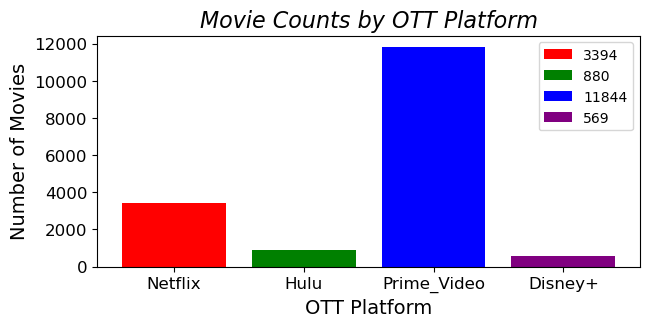

In [97]:
x=platform_count["Name"]
y=platform_count["Count"]
plt.figure(figsize=(7, 3))
plt.bar(x,y, color=['red', 'green', 'blue', 'purple'],label=y)
plt.title("Movie Counts by OTT Platform", fontsize=16,fontstyle="italic")
plt.xlabel("OTT Platform", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
#plt.grid(axis='y', linestyle='--', alpha=0.7,color='b')
plt.show()

#####  conclusion:  Prime Video has the most content, followed by Netflix Hulu  and Disney+.

### ---------------------------------------------------------------------------------------------------------------------------------

#### Which OTT platform has the highest percentage of high-rated movieson IMDb?

In [101]:
# Filter the dataset for movies with IMDb rating >= 7
high_rated_movies = movies[movies['IMDb'] >= 7]

# Count the number of high-rated movies for each platform
high_rated_platform_counts = high_rated_movies[['Netflix', 'Hulu', 'Prime_Video', 'Disney+']].sum()

# Count the total number of movies for each platform
total_platform_counts = movies[['Netflix', 'Hulu', 'Prime_Video', 'Disney+']].sum()

# Calculate the percentage of high-rated movies for each platform
high_rated_percentage = (high_rated_platform_counts / total_platform_counts) * 100
high_rated_percentage=pd.DataFrame(list(high_rated_percentage.items()), columns=["PName", "HCount"])
high_rated_percentage["HCount"] = high_rated_percentage["HCount"].round(2)
high_rated_percentage

,PName,HCount
0,Netflix,30.82
1,Hulu,27.27
2,Prime_Video,22.88
3,Disney+,32.86


In [103]:
x=high_rated_percentage["PName"]
y=high_rated_percentage["HCount"]

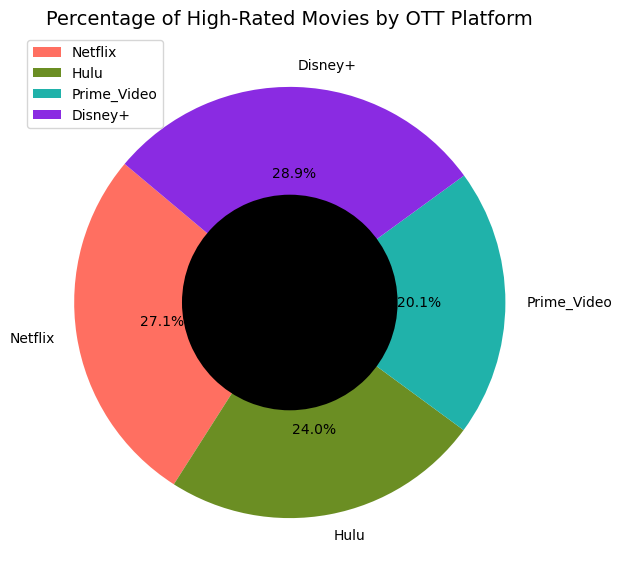

In [105]:
colors = ['#FF6F61', '#6B8E23', '#20B2AA', '#8A2BE2']
plt.figure(figsize=(8, 7))
plt.pie(y, labels=x, colors=colors, autopct='%1.1f%%', startangle=140)
plt.pie([1],radius=0.5,colors="k")
plt.title("Percentage of High-Rated Movies by OTT Platform", fontsize=14)
plt.legend()
plt.show()

##### conclusion : Disney+ stands out as the platform with the highest proportion of high-rated movies, while Prime Video has the lowest percentage among the four platforms.

### ---------------------------------------------------------------------------------------------------------------------------------

#### What is the average IMDb rating of movies exclusive to each OTT platform?

In [109]:
exclusive_movies = movies[movies.duplicated(subset='Title', keep=False) == False]
#  Calculate the average IMDb rating of exclusive movies for each platfo
avg_rating_per_platform = exclusive_movies.groupby('Platform')['IMDb'].mean()
avg_rating_per_platform
#pd.DataFrame(list(avg_rating_per_platform.items()),columns=["Platform","AVG_Rating"])
avg_rating_per_platform = avg_rating_per_platform.reset_index()
avg_rating_per_platform.columns = ["Platform", "AVG_Rating"]
avg_rating_per_platform["AVG_Rating"]=avg_rating_per_platform["AVG_Rating"].round(2)
avg_rating_per_platform

,Platform,AVG_Rating
0,Disney+,6.45
1,Hulu,6.20
2,Netflix,6.33
3,Prime_Video,5.84


C:\Users\sachi\AppData\Local\Temp\ipykernel_13004\4251123664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')


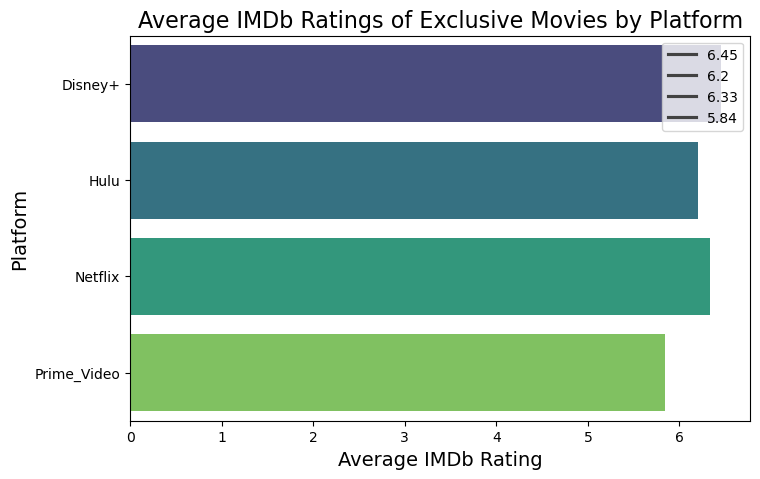

In [111]:
x=avg_rating_per_platform["AVG_Rating"]
y=avg_rating_per_platform["Platform"]
plt.figure(figsize=(8, 5))
sns.barplot(x=x, y=y, palette='viridis')
plt.legend(x)
plt.title("Average IMDb Ratings of Exclusive Movies by Platform", fontsize=16)
plt.xlabel("Average IMDb Rating", fontsize=14)
plt.ylabel("Platform", fontsize=14)
plt.show()

##### conclusion : Disney+ leads in the quality of exclusive movies (based on IMDb ratings), while Prime Video lags behind the other platforms.

### ---------------------------------------------------------------------------------------------------------------------------------

#### Which platform offers the most genre diversity in its catalog?

In [117]:
# Combine the platform information with the genre binary table
platform_genre_diversity = pd.concat([movies['Platform'], genre_dummies], axis=1)

# Group by platform and sum the binary genre columns to get genre counts per platform
genre_diversity = platform_genre_diversity.groupby('Platform').sum().gt(0).sum(axis=1)

diversity_df = genre_diversity.reset_index()
diversity_df.columns = ['Platform', 'Genre Diversity Count']
diversity_df

,Platform,Genre Diversity Count
0,Disney+,30
1,Hulu,33
2,Netflix,38
3,Prime_Video,38


##### conclusion : This suggests that Prime Video and Netflix provide the most varied content in terms of genre selection, while Disney+ offers a more focused catalog, potentially specializing in certain genres like family-friendly content and franchises.

### ---------------------------------------------------------------------------------------------------------------------------------

#### What is the top genre with the highest average rating across all platforms?
#### What is the genre with the highest average IMDb rating?

In [121]:

b['IMDb'] = pd.to_numeric(b['IMDb'], errors='coerce')
genre_columns = b.columns[1:]  # All columns except the first 'IMDb' column
b[genre_columns] = b[genre_columns].apply(pd.to_numeric, errors='coerce')

# Replace NaN or infinite values with 0, then convert to integer
b[genre_columns] = b[genre_columns].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

# Calculate the average IMDb rating for each individual genre
avg_genre_ratings = b[genre_columns].multiply(b['IMDb'], axis=0).sum() / b[genre_columns].sum()

pd.DataFrame(list(avg_genre_ratings.items()),columns=["Genres","Rating"]).head() 
avg_genre_ratings.sort_values(ascending=False)
#pd.DataFrame(avg_genre_ratings)

Game-Show      8.200000
 War           7.800000
 History       7.700000
 Action        7.550000
 Sport         7.400000
News           7.269000
 Comedy        7.233333
 Adventure     7.150000
 Crime         7.080000
Documentary    7.074602
 Fantasy       6.920000
Biography      6.860837
 Drama         6.847368
History        6.808987
 Music         6.800000
 Sci-Fi        6.785714
 Mystery       6.766667
Short          6.766201
Music          6.637888
 Western       6.600000
 Family        6.600000
 Thriller      6.554545
 Horror        6.533333
Sport          6.493199
Reality-TV     6.433333
 Romance       6.400000
Animation      6.369514
Film-Noir      6.332911
War            6.309696
Musical        6.263636
Drama          6.122355
Family         6.094959
Romance        6.076793
Comedy         5.937740
Western        5.933740
Crime          5.911692
Fantasy        5.717433
Mystery        5.689565
Adventure      5.648966
Talk-Show      5.560000
Action         5.492296
Thriller       5

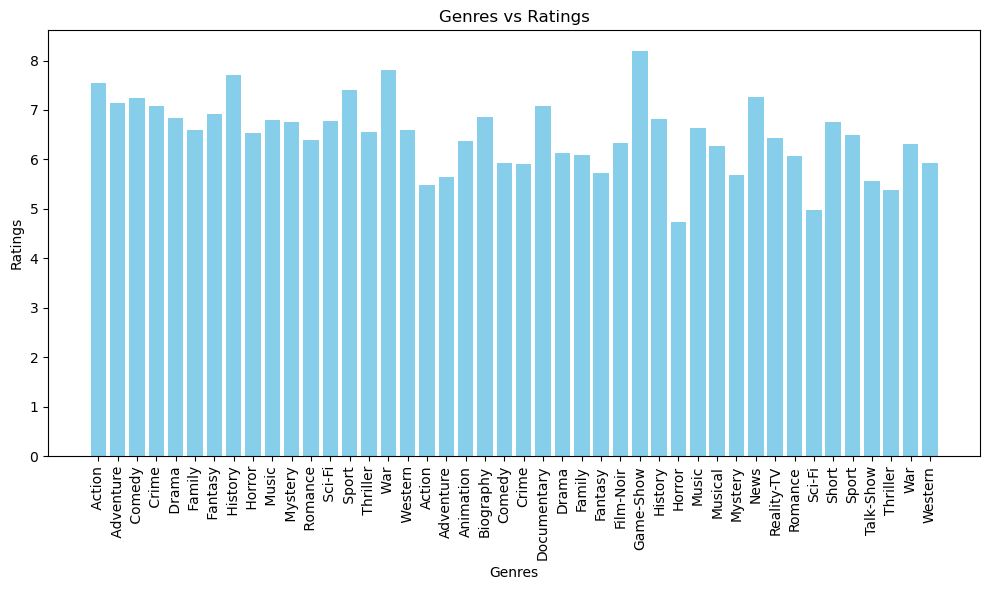

In [123]:
x=avg_genre_ratings.index
y=avg_genre_ratings.values
plt.figure(figsize=(10, 6))
plt.bar(x,y, color='skyblue')
plt.xticks(rotation=90)
plt.title('Genres vs Ratings')
plt.xlabel('Genres')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()

##### conclusion : Game-shows has highest rating followed by history and all

### ---------------------------------------------------------------------------------------------------------------------------------

#### What is the top genre per platform?

In [169]:
Netflix_Gener= a.drop(['IMDb','Hulu','Prime_Video','Disney+','ID','Title','Directors','Runtime_in_Min','Runtime_Category',
                     'Genres', 'Country', 'Language','IMDb_Rating_Category',
                     'Platform_Count', 'Platform', 'Year'], axis=1).groupby(['Netflix']).sum().iloc[1]
Netflix_Gener=pd.DataFrame(list(Netflix_Gener.items()),columns=["Name","Count"])
Netflix_Gener= Netflix_Gener.sort_values(by="Count", ascending=False)
Netflix_Gener.head()


,Name,Count
24,Drama,1479
21,Comedy,1277
41,Thriller,641
36,Romance,543
17,Action,542


C:\Users\sachi\AppData\Local\Temp\ipykernel_13004\231999961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Netflix_Gener["Count"],y=Netflix_Gener["Name"],data=Netflix_Gener,palette='CMRmap',orient="h")


<Axes: xlabel='Count', ylabel='Name'>

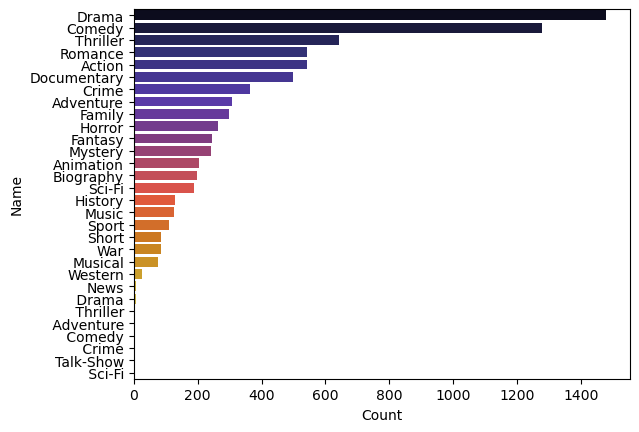

In [171]:
Netflix_Gener= Netflix_Gener.nlargest(30, 'Count')
sns.barplot(x=Netflix_Gener["Count"],y=Netflix_Gener["Name"],data=Netflix_Gener,palette='CMRmap',orient="h")

In [175]:
HuluGeners= a.drop(['IMDb','Netflix','Prime_Video','Disney+','ID','Title','Directors','Genres','Country','Language','Runtime_in_Min','IMDb_Rating_Category','Platform_Count','Platform','Runtime_Category','Year'],axis=1).groupby(['Hulu']).sum().iloc[1]
HuluGeners=pd.DataFrame(list(HuluGeners.items()),columns=["Name","Count"])
HuluGeners= HuluGeners.sort_values(by="Count", ascending=False)
HuluGeners.head()

,Name,Count
24,Drama,428
21,Comedy,271
41,Thriller,218
36,Romance,148
23,Documentary,129


C:\Users\sachi\AppData\Local\Temp\ipykernel_13004\118247866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=HuluGeners["Count"],y=HuluGeners["Name"],data=HuluGeners,palette='CMRmap',orient="h")


<Axes: xlabel='Count', ylabel='Name'>

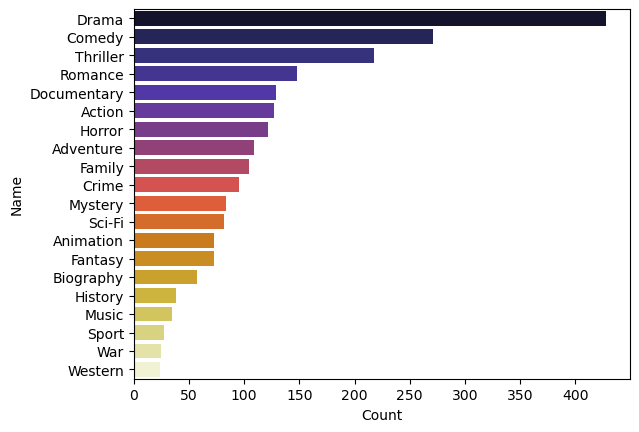

In [177]:
HuluGeners= HuluGeners.nlargest(20, 'Count')
sns.barplot(x=HuluGeners["Count"],y=HuluGeners["Name"],data=HuluGeners,palette='CMRmap',orient="h")

In [179]:
prime_VideoGenres = a.drop(['IMDb','Hulu', 'Netflix', 'Disney+','ID','Title','Directors','Genres','Country', 'Language',
       'Runtime_in_Min', 'IMDb_Rating_Category', 'Platform_Count', 'Platform',
       'Runtime_Category','Year',],axis=1).groupby(['Prime_Video']).sum().iloc[1]
prime_VideoGenres=pd.DataFrame(list(prime_VideoGenres.items()),columns=["Name","Count"])
prime_VideoGenres= prime_VideoGenres.sort_values(by="Count", ascending=False)
prime_VideoGenres.head()

,Name,Count
24,Drama,5320
21,Comedy,2918
41,Thriller,2580
17,Action,2022
30,Horror,1857


C:\Users\sachi\AppData\Local\Temp\ipykernel_13004\497272974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prime_VideoGenres["Count"],y=prime_VideoGenres["Name"],data=prime_VideoGenres,palette='CMRmap',orient="h")


<Axes: xlabel='Count', ylabel='Name'>

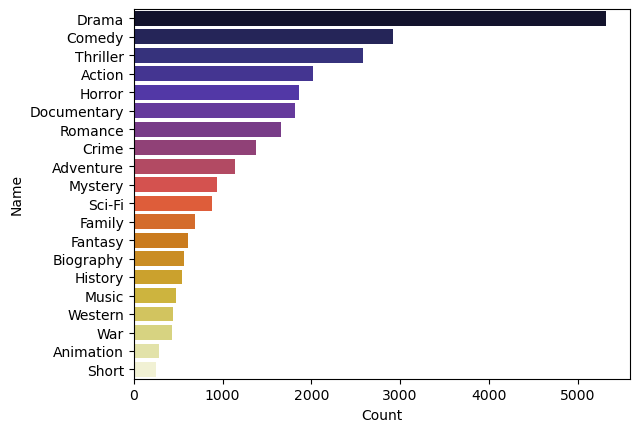

In [181]:
prime_VideoGenres= prime_VideoGenres.nlargest(20, 'Count')
sns.barplot(x=prime_VideoGenres["Count"],y=prime_VideoGenres["Name"],data=prime_VideoGenres,palette='CMRmap',orient="h")

In [183]:
DisneyGenres= a.drop(['IMDb','Hulu','Netflix','Prime_Video','ID','Title','Directors','Genres','Country','Language',
       'Runtime_in_Min','IMDb_Rating_Category','Platform_Count','Platform',
       'Runtime_Category','Year'],axis=1).groupby(['Disney+']).sum().iloc[1]
DisneyGenres=pd.DataFrame(list(DisneyGenres.items()),columns=["Name","Count"])
DisneyGenres= DisneyGenres.sort_values(by="Count", ascending=False)
DisneyGenres.head()

,Name,Count
25,Family,428
21,Comedy,281
18,Adventure,255
26,Fantasy,173
24,Drama,160


C:\Users\sachi\AppData\Local\Temp\ipykernel_13004\1435218712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=DisneyGenres["Count"],y=DisneyGenres["Name"],data=DisneyGenres,palette='CMRmap',orient="h")


<Axes: xlabel='Count', ylabel='Name'>

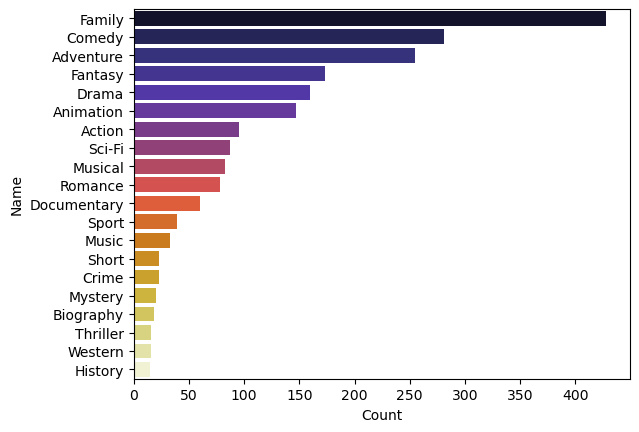

In [185]:
DisneyGenres= DisneyGenres.nlargest(20, 'Count')
sns.barplot(x=DisneyGenres["Count"],y=DisneyGenres["Name"],data=DisneyGenres,palette='CMRmap',orient="h")

##### conclusion: Disney+ has highest number of moveies on Family Geners followed by comedy and Adventure where ass other platform has Drama  as a hiighest geners followed by comedy and thrill.

### ---------------------------------------------------------------------------------------------------------------------------------

#### What is the top genre per year?

In [192]:
# Split Genres into a list and explode into separate rows
a['Genres_List'] = a['Genres'].str.split(',')
exploded_df = a.explode('Genres_List')

# Group by 'Year', 'Genres_List', and platforms, counting occurrences
genre_platform_counts = exploded_df.groupby(['Year', 'Genres_List', 'Netflix', 'Hulu', 'Prime_Video', 'Disney+']).size().reset_index(name='Count')

# Filter rows where platforms have a count > 0
genre_platform_counts = genre_platform_counts[
    (genre_platform_counts['Netflix'] > 0) | 
    (genre_platform_counts['Hulu'] > 0) | 
    (genre_platform_counts['Prime_Video'] > 0) | 
    (genre_platform_counts['Disney+'] > 0)
]

# Summarize by Year, Platform, and Genre
summary = genre_platform_counts.groupby(['Year', 'Genres_List'])[['Netflix', 'Hulu', 'Prime_Video', 'Disney+', 'Count']].sum()

# Sort by Year and Count (descending)
summary_sorted = summary.sort_values(['Year', 'Count'], ascending=[True,False])

# Display the result
summary_sorted.head(20)


Netflix  Hulu  Prime_Video  Disney+  Count
Year Genres_List                                            
1902 Action             0     0            1        0      1
     Adventure          0     0            1        0      1
     Comedy             0     0            1        0      1
     Fantasy            0     0            1        0      1
     Sci-Fi             0     0            1        0      1
     Short              0     0            1        0      1
1912 Biography          0     0            1        0      1
     Drama              0     0            1        0      1
1913 Comedy             0     0            1        0      2
     Short              0     0            1        0      2
     Action             0     0            1        0      1
1915 Comedy             0     0            1        0      2
     Drama              0     0            1        0      2
     Short              0     0            1        0      2
     History            0     0            1        0      1
     War                0     0            1        0      1
1916 Drama              0     0            1        0      1
     History            0     0            1        0      1
1917 Adventure          0     0            1        0      1
     Comedy             0     0            1        0      1

In [194]:

# Create a new column where genres are split into individual genres
a['Genres_List'] = a['Genres'].str.split(',')

# Explode the list of genres into separate rows
exploded_df = a.explode('Genres_List')

# Group by 'Year' and 'Genres_List' to count the occurrences of each genre per year
genre_counts = exploded_df.groupby(['Year', 'Genres_List']).size().reset_index(name='Count')

# Sort by 'Count' in descending order, and 'Year' in ascending order
sorted_genre_counts = genre_counts.sort_values(['Count', 'Year'], ascending=[False, True])

# You can also filter to get the top genre for each year
top_genres_per_year = sorted_genre_counts.groupby('Year').head(1)

# Display the result
top_genres_per_year[['Year', 'Genres_List', 'Count']]


,Year,Genres_List,Count
1858,2017,Drama,565
1882,2018,Drama,505
1834,2016,Drama,496
1809,2015,Drama,460
1785,2014,Drama,401
...,...,...,...
6,1912,Biography,1
16,1916,Drama,1
18,1917,Adventure,1
61,1924,Comedy,1


##### conclusion : After looking at data it is clear that Drama geners has top movies in most of the year. 

### ---------------------------------------------------------------------------------------------------------------------------------

#### What is the rating distribution on OTT platforms (overall and split by platform)?

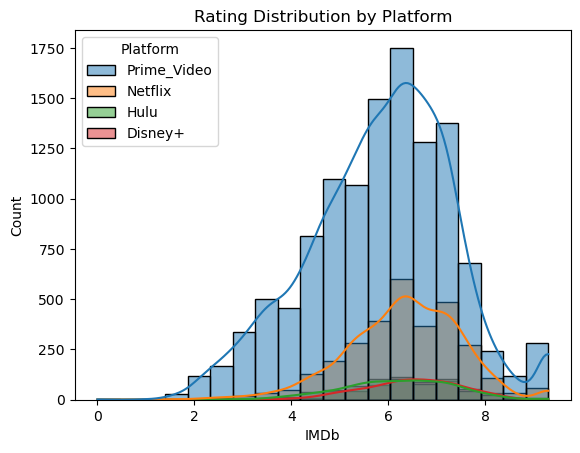

In [198]:
sns.histplot(movies, x='IMDb', hue='Platform', kde=True, bins=20)
plt.title("Rating Distribution by Platform")
plt.show()

##### conclusion : Visual representation of rating distribution for all platforms are normal distribution.

### ---------------------------------------------------------------------------------------------------------------------------------

#### What is the distribution of IMDb ratings for movies released in the last 5 years?

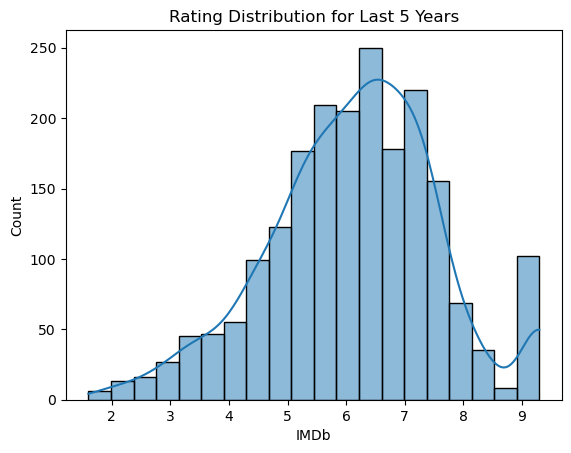

In [202]:
recent_movies = movies[movies['Year'] >= movies['Year'].max() - 5]
sns.histplot(recent_movies, x='IMDb', kde=True, bins=20)
plt.title("Rating Distribution for Last 5 Years")
plt.show()


### ---------------------------------------------------------------------------------------------------------------------------------

#### How does the average movie runtime vary across OTT platforms?

In [205]:
avg_runtime_per_platform = movies.groupby('Platform')['Runtime_in_Min'].mean()
pd.DataFrame(avg_runtime_per_platform)


,Runtime_in_Min
Platform,
Disney+,91.817021
Hulu,95.724461
Netflix,99.357081
Prime_Video,92.784876


##### conclusion : From a runtime perspective, Netflix could be considered the platform offering longer movies, while Disney+ leans towards shorter films. If your goal is to focus on longer movies for certain genres or preferences, Netflix might be the platform to prioritize.

### ---------------------------------------------------------------------------------------------------------------------------------

#### How old are the movies on OTT platforms on average (overall and split by platform)?

In [209]:
movies['Movie_Age'] = movies['Year'].max() - movies['Year']
avg_movie_age = movies.groupby('Platform')['Movie_Age'].mean()
pd.DataFrame(avg_movie_age)


,Movie_Age
Platform,
Disney+,24.843585
Hulu,10.282609
Netflix,9.049358
Prime_Video,23.307965


##### conclusion : For the best platform for new movie releases, Hulu and Netflix stand out due to their younger average movie ages.

### ---------------------------------------------------------------------------------------------------------------------------------

#### How does the average IMDb rating of movies differ between platforms for the same genres?


In [260]:
avg_ratings = movies.groupby(['Platform', 'Genres'])['IMDb'].mean()
pd.DataFrame(avg_ratings).sort_values(by="IMDb",ascending=False)


IMDb
Platform    Genres                                                  
Hulu        Adventure,Biography,Drama,Thriller                   9.3
Prime_Video Drama,Family,Romance,Western                         9.3
            Documentary,Action,Family,History                    9.3
Netflix     Comedy,Musical                                       9.3
Prime_Video Action,Adventure,Comedy,War,Western                  9.3
...                                                              ...
            Action,Adventure,Drama,Fantasy,Horror,Mystery,S...   1.7
            Animation,Family,Fantasy,Romance                     1.6
            Action,Drama,Horror,Sci-Fi,Thriller,War              1.6
            Drama,Family,Fantasy,Musical                         1.4
            Action,Comedy,Fantasy,Horror,Mystery,Sci-Fi,Thr...   1.3

[2687 rows x 1 columns]

##### conclusion : Hulu, Prime Video, and Netflix excel in niche genres like Drama, Family and Comedy, Musical with IMDb ratings of 9.3, while some multi-genre combinations score as low as 1.3. This highlights strengths in specific genres and areas needing improvement

### ---------------------------------------------------------------------------------------------------------------------------------

#### Diversity of genres on each platform ?

In [252]:
genre_diversity = movies.groupby('Platform')['Genres'].nunique()
pd.DataFrame(genre_diversity)

,Genres
Platform,
Disney+,271
Hulu,262
Netflix,636
Prime_Video,1518


#  ----------------------------------------------------------------------------------------

### Final Conclusion:

#### Based on the analysis, the following insights can be drawn to determine the best OTT platform for movie releases based on genres, IMDb ratings, and other key factors:

###### .

#### Content Availability:
##### Prime Video offers the most content, making it a diverse platform in terms of quantity.
##### Netflix and Hulu follow closely, while Disney+ has a more focused content library.

###### .

#### Genre-Specific Insights:
##### Drama emerges as the dominant genre across most platforms, followed by Comedy and Thriller.
##### Disney+ excels in Family, Comedy, and Adventure genres, while other platforms favor Drama.
##### Niche genres like Comedy, Musical and Drama, Family achieve the highest IMDb ratings (up to 9.3), showcasing Hulu, Netflix, and Prime Video's strengths in these areas.
 
##### .

#### Quality of Content:
##### Disney+ leads in quality with the highest proportion of highly rated movies and excels in exclusive movies based on IMDb ratings.
##### Prime Video lags behind in overall quality but compensates with its vast library.

##### .

#### Audience Preferences:
##### Netflix caters to audiences seeking longer runtime movies, while Disney+ focuses on shorter films, ideal for family-oriented content.
##### For newer movie releases, Hulu and Netflix stand out with younger average movie ages.

##### .


#### Rating Distribution:
##### The rating distribution across all platforms generally follows a normal pattern, indicating consistency in audience reception.

##### .


#### Platform Strengths:
##### Disney+ stands out for its high-quality and family-friendly movies.
##### Hulu and Netflix are excellent platforms for new movie releases and niche genres.
##### Prime Video shines in diversity but needs improvement in exclusive content quality.


## Recommendation:
### For new movie releases, Hulu and Netflix are optimal choices due to their younger movie catalogs and strengths in popular genres like Drama and Comedy. If the focus is on high-quality, family-friendly movies, Disney+ is the preferred platform. Prime Video, while offering vast content, should prioritize improving the quality of its exclusive movies.

# --------------------------------------------------------------------------------------

# Project Summery

##  Objective:
#### Determine the best OTT platform for new movie releases based on genres and IMDb ratings.


## Key Insights:
#### Hulu and Netflix are optimal for Drama, Comedy, and Thriller genres due to their newer catalogs and higher viewer ratings.
#### Disney+ excels in Family, Adventure, and Fantasy genres, making it the best platform for high-quality, family-friendly content.
#### Prime Video offers a vast selection, especially in Action, Sci-Fi, and Thriller genres, but needs to improve the quality of its exclusive movies.

## Recommendation:
#### For new movie releases, Hulu and Netflix are optimal choices due to their younger movie catalogs and strengths in popular genres like Drama and Comedy. If the focus is on high-quality, family-friendly movies, Disney+ is the preferred platform. Prime Video, while offering vast content, should prioritize improving the quality of its exclusive movies.

# -----------------------------------THANK YOU---------------------------------------